In [6]:
import pandas as pd
import matplotlib.pyplot as plt

#글씨 지정
plt.rcParams['font.family'] = 'Malgun Gothic'

In [7]:
import pandas as pd

df = pd.read_csv('../Youri/daily_crowd_data.csv')
df

,날짜,요일,홈,방문,구장,관중수
0,2024/03/23,토,LG,한화,잠실,"23,750"
1,2024/03/23,토,SSG,롯데,문학,"23,000"
2,2024/03/23,토,NC,두산,창원,"17,891"
3,2024/03/23,토,KT,삼성,수원,"18,700"
4,2024/03/23,토,KIA,키움,광주,"20,500"
...,...,...,...,...,...,...
568,2024/08/18,일,SSG,한화,문학,"22,545"
569,2024/08/18,일,LG,KIA,잠실,"23,750"
570,2024/08/18,일,KT,두산,수원,"12,164"
571,2024/08/18,일,NC,삼성,창원,"12,328"


In [8]:
type('요일')

str

In [15]:
# '요일'이 토요일 또는 일요일이거나
# '홈' 또는 '방문'이 '한화'인 경우를 필터링
weekend_crowd = df[
    ((df['요일'] == '토') | (df['요일'] == '일')) &
    ((df['홈'] == '한화') | (df['방문'] == '한화'))
]

print(weekend_crowd)


             날짜 요일    홈   방문  구장     관중수
0    2024/03/23  토   LG   한화  잠실  23,750
5    2024/03/24  일   LG   한화  잠실  23,750
28   2024/03/30  토   한화   KT  대전  12,000
33   2024/03/31  일   한화   KT  대전  12,000
55   2024/04/06  토   키움   한화  고척  16,000
60   2024/04/07  일   키움   한화  고척  16,000
85   2024/04/13  토   한화  KIA  대전  12,000
90   2024/04/14  일   한화  KIA  대전  12,000
115  2024/04/20  토   한화   삼성  대전  12,000
121  2024/04/21  일   한화   삼성  대전  12,000
146  2024/04/27  토   한화   두산  대전  12,000
151  2024/04/28  일   한화   두산  대전  12,000
173  2024/05/04  토  KIA   한화  광주  20,500
197  2024/05/11  토   한화   키움  대전  12,000
204  2024/05/12  일   한화   키움  대전  12,000
222  2024/05/18  토   삼성   한화  대구  24,000
227  2024/05/19  일   삼성   한화  대구  24,000
252  2024/05/25  토  SSG   한화  문학  23,000
280  2024/06/01  토   삼성   한화  대구  24,000
285  2024/06/02  일   삼성   한화  대구  24,000
312  2024/06/08  토   한화   NC  대전  12,000
316  2024/06/09  일   한화   NC  대전  12,000
343  2024/06/15  토   한화  SSG  대전  12,000
348  2024/06/16 

In [25]:
weekday_crowd = df[
    ((df['요일'] != '토') & (df['요일'] != '일')) &
    ((df['홈'] == '한화') | (df['방문'] == '한화'))
]
weekday_crowd

,날짜,요일,홈,방문,구장,관중수
9,2024/03/26,화,SSG,한화,문학,"10,541"
14,2024/03/27,수,SSG,한화,문학,"11,005"
19,2024/03/28,목,SSG,한화,문학,"11,755"
23,2024/03/29,금,한화,KT,대전,"12,000"
38,2024/04/02,화,한화,롯데,대전,"12,000"
...,...,...,...,...,...,...
535,2024/08/09,금,한화,키움,대전,"11,302"
547,2024/08/13,화,한화,LG,대전,"11,748"
551,2024/08/14,수,한화,LG,대전,"11,884"
555,2024/08/15,목,한화,LG,대전,"12,000"


In [28]:
weekday_crowd['관중수'] = weekday_crowd['관중수'].str.replace(',', '').astype(int)

C:\Users\medici\AppData\Local\Temp\ipykernel_11728\2178273203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekday_crowd['관중수'] = weekday_crowd['관중수'].str.replace(',', '').astype(int)


In [29]:
weekday_crowd['관중수'].mean()

np.float64(13485.142857142857)

In [42]:
weekend_crowd['관중수']

0      23750
5      23750
28     12000
33     12000
55     16000
60     16000
85     12000
90     12000
115    12000
121    12000
146    12000
151    12000
173    20500
197    12000
204    12000
222    24000
227    24000
252    23000
280    24000
285    24000
312    12000
316    12000
343    12000
348    12000
372    19085
373    18860
437    12000
441    12000
460    12000
462    12000
487    23750
511    12000
539    12000
544    12000
563    23000
568    22545
Name: 관중수, dtype: int64

In [40]:
# 쉼표를 제거하고 int로 변환
weekend_crowd['관중수'] = weekend_crowd['관중수'].str.replace(',', '').astype(float)

AttributeError: Can only use .str accessor with string values!

In [31]:
weekend_crowd['관중수'].mean()

np.float64(16062.222222222223)

In [ ]:
from scipy import stats
t, pvalue = stats.ttend_ind()

In [20]:
total_crowd = weekend_crowd['관중수'].sum()
total_crowd

np.int64(3271256)

In [31]:
# Weekend group의 관중수 평균의 표준편차
weekend_std = weekend_crowd['관중수'].std()

# Weekday group의 관중수 평균의 표준편차
weekday_std = weekday_crowd['관중수'].std()

print(f"Weekend group 관중수 표준편차: {weekend_std:.4f}")
print(f"Weekday group 관중수 표준편차: {weekday_std:.4f}")


Weekend group 관중수 표준편차: 4883.1584
Weekday group 관중수 표준편차: 5339.8006


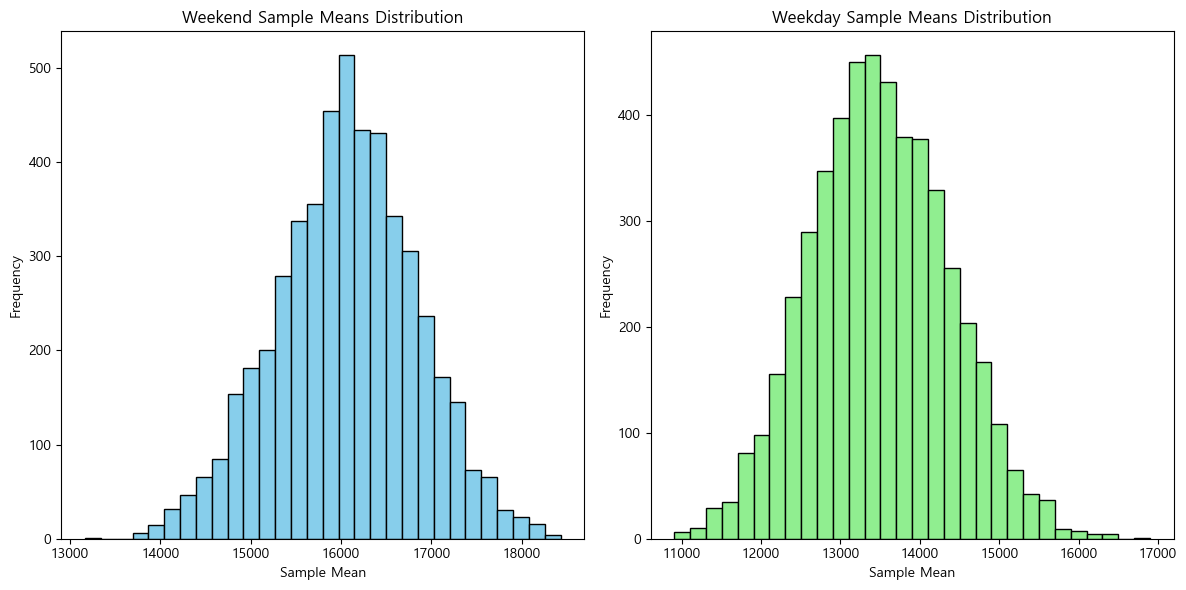

In [33]:
import matplotlib.pyplot as plt

# 샘플 평균을 저장할 리스트
weekend_sample_means = []
weekday_sample_means = []

# 주말 관중수에서 10개 샘플 평균 5000회 추출
for _ in range(5000):
    m = weekend_crowd['관중수'].sample(20).mean()
    weekend_sample_means.append(m)

# 주중 관중수에서 10개 샘플 평균 5000회 추출
for _ in range(5000):
    m = weekday_crowd['관중수'].sample(20).mean()
    weekday_sample_means.append(m)

# 히스토그램 시각화
plt.figure(figsize=(12, 6))

# 주말 샘플 평균 히스토그램
plt.subplot(1, 2, 1)
plt.hist(weekend_sample_means, bins=30, color='skyblue', edgecolor='black')
plt.title('Weekend Sample Means Distribution')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')

# 주중 샘플 평균 히스토그램
plt.subplot(1, 2, 2)
plt.hist(weekday_sample_means, bins=30, color='lightgreen', edgecolor='black')
plt.title('Weekday Sample Means Distribution')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [34]:
from scipy import stats

# 주말과 주중의 '관중수' 평균 차이를 검정
t_stat, p_value = stats.ttest_ind(weekend_crowd['관중수'], weekday_crowd['관중수'], equal_var=True)

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# 결과 해석
alpha = 0.05
if p_value < alpha:
    print("두 집단의 평균 차이가 통계적으로 유의합니다.")
else:
    print("두 집단의 평균 차이가 통계적으로 유의하지 않습니다.")


t-statistic: 2.6769
p-value: 0.0086
두 집단의 평균 차이가 통계적으로 유의합니다.


C:\Users\medici\AppData\Local\Temp\ipykernel_11728\457800114.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['주중', '주말'], y=[weekday_mean, weekend_mean], palette='pastel',width=0.5)


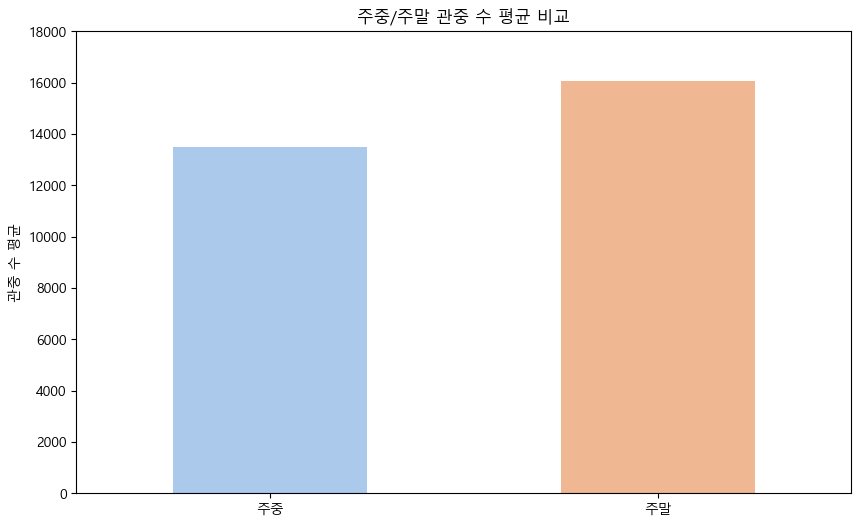

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 가정: weekend_crowd와 weekday_crowd 데이터프레임이 이미 존재하며, '관중수' 열이 정수형으로 변환되어 있음

# t-test를 수행하여 두 그룹 간의 평균 차이를 검정
t, pvalue = stats.ttest_ind(weekday_crowd['관중수'], weekend_crowd['관중수'], equal_var=False)

# 평균값 계산
weekday_mean = weekday_crowd['관중수'].mean()
weekend_mean = weekend_crowd['관중수'].mean()


# 결과를 그래프로 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=['주중', '주말'], y=[weekday_mean, weekend_mean], palette='pastel',width=0.5)

# 그래프에 t-value와 p-value 표시
plt.title(f'주중/주말 관중 수 평균 비교')
plt.ylabel('관중 수 평균')
plt.ylim(0, 18000)
plt.show()
